In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
d5=pd.read_csv('salary.csv')
d5.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Fathers Name,Mothers Name,Mothers Maiden Name,...,SSN,Phone No,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh


In [3]:
d5.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Fathers Name', 'Mothers Name',
       'Mothers Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs',
       'Weight in Kgs', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company', 'Salary', 'Last Hike',
       'SSN', 'Phone No', 'Place Name', 'County', 'City', 'State', 'Zip',
       'Region', 'User Name', 'Password'],
      dtype='object')

In [4]:
d5.drop('Emp ID',axis=1,inplace=True)
d5.drop('Name Prefix',axis=1,inplace=True)
d5.drop('First Name',axis=1,inplace=True)
d5.drop('Middle Initial',axis=1,inplace=True)
d5.drop('Last Name',axis=1,inplace=True)
d5.drop('E Mail',axis=1,inplace=True)
d5.drop('Fathers Name',axis=1,inplace=True)
d5.drop('Mothers Name',axis=1,inplace=True)
d5.drop('Mothers Maiden Name',axis=1,inplace=True)
d5.drop('Date of Birth',axis=1,inplace=True)
d5.drop('Time of Birth',axis=1,inplace=True)
d5.drop('Weight in Kgs',axis=1,inplace=True)
d5.drop('Month Name of Joining',axis=1,inplace=True)
d5.drop('Phone No',axis=1,inplace=True)
d5.drop('Place Name',axis=1,inplace=True)
d5.drop('County',axis=1,inplace=True)  
d5.drop('State',axis=1,inplace=True)
d5.drop('Zip',axis=1,inplace=True)
d5.drop('Region',axis=1,inplace=True)
d5.drop('User Name',axis=1,inplace=True)
d5.drop('Password',axis=1,inplace=True) 
d5.drop('SSN',axis=1,inplace=True)
d5.drop('Date of Joining',axis=1,inplace=True)
d5.drop('Quarter of Joining',axis=1,inplace=True)
d5.drop('Half of Joining',axis=1,inplace=True) 
d5.drop('Short Month',axis=1,inplace=True)
d5.drop('Day of Joining',axis=1,inplace=True)
d5.drop('DOW of Joining',axis=1,inplace=True)
d5.drop('Short DOW',axis=1,inplace=True) 

In [5]:
d5=d5[['Gender','Age in Yrs','Month of Joining','Year of Joining','Age in Company','City','Last Hike','Salary']]

In [42]:
d5['Last Hike']=(d5['Last Hike'].str.strip('%').astype(int))

AttributeError: Can only use .str accessor with string values!

In [6]:
d5.head()

,Gender,Age in Yrs,Month of Joining,Year of Joining,Age in Company,City,Last Hike,Salary
0,F,45.66,12,2010,6.61,Las Vegas,17%,119090
1,M,23.76,4,2017,0.26,Irons,14%,117991
2,F,22.68,3,2017,0.34,Lexington,28%,161045
3,F,41.70,2,2003,14.43,Munster,16%,142616
4,F,22.39,10,2016,0.79,Fairbanks,11%,135706


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in d5.columns:
    d5[i]=le.fit_transform(d5[i])

In [8]:
d5.nunique()

Gender                2
Age in Yrs          889
Month of Joining     12
Year of Joining      38
Age in Company      811
City                880
Last Hike            31
Salary              997
dtype: int64

In [9]:
d5.isnull().sum()

Gender              0
Age in Yrs          0
Month of Joining    0
Year of Joining     0
Age in Company      0
City                0
Last Hike           0
Salary              0
dtype: int64

In [10]:
#there rae no null values

In [11]:
d5.describe()

,Gender,Age in Yrs,Month of Joining,Year of Joining,Age in Company,City,Last Hike,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.509000,445.660000,5.415000,26.992000,375.487000,437.719000,15.007000,498.776000
std,0.500169,257.936802,3.428488,8.565588,235.030728,252.677922,8.754747,287.924216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,224.750000,3.000000,22.000000,171.750000,215.750000,8.000000,249.750000
50%,1.000000,445.500000,5.000000,29.000000,360.500000,436.500000,15.000000,499.500000
75%,1.000000,671.250000,9.000000,34.000000,576.250000,657.250000,22.000000,748.250000
max,1.000000,888.000000,11.000000,37.000000,810.000000,879.000000,30.000000,996.000000


In [12]:
#median is higher than mean for year of joining and salary,so they are left skewed datas
#there is a large difference between 75% and max for  age in years,age in company,salary and city.so there are outliers present

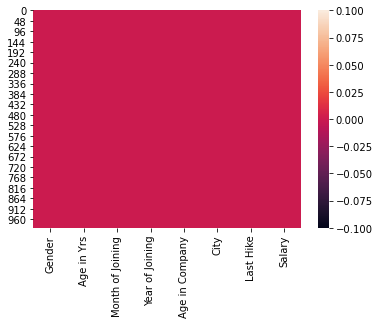

In [13]:
sns.heatmap(d5.isnull())

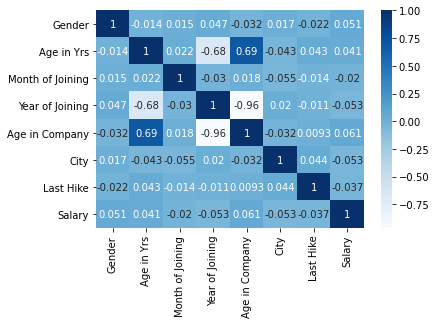

In [14]:
d5cor=d5.corr()
plt.figure(figsize=(6,4))
sns.heatmap(d5cor,cmap='Blues',annot=True)

In [15]:
collist=d5.columns.values
ncol=22
nrows=8

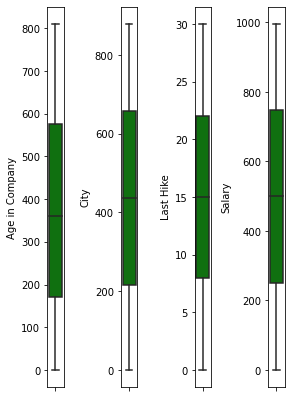

In [16]:
plt.figure(figsize=(ncol,2*ncol))
for i in range(4,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d5[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [17]:
d5.skew()

Gender             -0.036060
Age in Yrs         -0.008683
Month of Joining    0.057287
Year of Joining    -0.958797
Age in Company      0.138871
City                0.012028
Last Hike           0.007634
Salary             -0.004979
dtype: float64

In [18]:
for col in d5.columns:
    if d5.skew().loc[col]>0.55:
        d5[col]=np.log1p(d5[col])

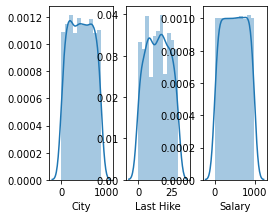

In [19]:
plt.figure(figsize=(30,30))
for i in range(5,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d5[collist[i]])

In [20]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(d5))
z

array([[1.01816496, 0.51332814, 1.62981311, ..., 0.10975581, 0.68648537,
        0.00617138],
       [0.98215912, 1.50367831, 0.70474461, ..., 0.29981602, 1.02932806,
        0.03744524],
       [1.01816496, 1.60064978, 0.99656433, ..., 0.05828117, 0.68488543,
        0.91119536],
       ...,
       [1.01816496, 1.70801658, 1.28838405, ..., 1.46220048, 1.02932806,
        0.84709089],
       [1.01816496, 0.91797067, 0.99656433, ..., 1.26026151, 1.71341353,
        1.20152804],
       [1.01816496, 1.70413773, 1.58020376, ..., 0.17137491, 1.37057083,
        0.30848542]])

In [21]:
threshold=3
print(np.where(z>3))

(array([594, 606, 621, 684, 895, 999], dtype=int64), array([3, 3, 3, 3, 3, 3], dtype=int64))


In [22]:
d5_new=d5[(z<3).all(axis=1)]
print(d5.shape)
print(d5_new.shape)

(1000, 8)
(994, 8)


In [23]:
# 6 rows are deleted due to presence of outliers

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [25]:
x=d5.iloc[:,:-1]
x

,Gender,Age in Yrs,Month of Joining,Year of Joining,Age in Company,City,Last Hike
0,0,578,11,30,317,410,9
1,1,58,3,37,17,362,6
2,0,33,2,37,24,423,21
3,0,475,1,23,551,521,8
4,0,26,9,36,53,236,3
...,...,...,...,...,...,...,...
995,0,254,0,28,416,520,2
996,1,214,2,30,342,267,8
997,0,886,1,21,605,807,6
998,0,209,2,32,274,756,30


In [26]:
y=d5.iloc[:,-1]
y

0      497
1      488
2      761
3      652
4      605
      ... 
995    188
996    518
997    255
998    153
999    410
Name: Salary, Length: 1000, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.01816496,  0.51332814,  1.62981311, ..., -0.24897283,
        -0.10975581, -0.68648537],
       [ 0.98215912, -1.50367831, -0.70474461, ..., -1.52604036,
        -0.29981602, -1.02932806],
       [-1.01816496, -1.60064978, -0.99656433, ..., -1.49624212,
        -0.05828117,  0.68488543],
       ...,
       [-1.01816496,  1.70801658, -1.28838405, ...,  0.977012  ,
         1.46220048, -1.02932806],
       [-1.01816496, -0.91797067, -0.99656433, ..., -0.43201918,
         1.26026151,  1.71341353],
       [-1.01816496,  1.70413773, -1.58020376, ...,  1.84541793,
         0.17137491,  1.37057083]])

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [29]:
x_train.shape

(780, 7)

In [30]:
x_test.shape

(220, 7)

In [31]:
y_train.shape

(780,)

In [32]:
y_test.shape

(220,)

In [33]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [34]:
lm.coef_

array([  8.46796673,  -6.70779851,  -8.44774686, -12.87763037,
        15.53771526, -21.30126148,  -8.98582742])

In [35]:
lm.intercept_

509.67689055771694

In [36]:
lm.score(x_train,y_train)

0.015626869658610265

In [37]:
pred=lm.predict(x_test)
print('predicted o/p:',pred)
print('actual o/p',y_test)

predicted o/p: [519.89242113 467.21024367 542.92999837 493.9879912  533.51675474
 459.4036727  547.8043279  492.31025938 519.7593626  486.73572902
 558.98132933 521.49808043 501.42207805 462.19325439 479.92698885
 562.16509264 476.42340594 493.30913025 452.98458979 522.20502392
 483.20623214 501.47481839 489.86938989 435.75363043 505.35075489
 523.69178797 446.6960474  488.57873868 541.57411202 507.55967211
 484.61375226 560.44756639 591.18880089 536.52518325 553.10281237
 466.90271053 506.0178692  492.85862632 558.0607243  526.79825898
 475.82601622 527.33188502 457.18661833 451.57006743 475.11537332
 518.48015327 521.65469732 513.15125929 519.22925907 542.77114657
 465.41765096 483.18515061 494.68683187 505.73792635 462.31278567
 506.32383734 553.23709307 508.50609393 489.49762267 541.53892584
 523.12348632 556.36034173 529.68351745 472.29951664 465.98757916
 521.20470309 474.32516194 461.50970789 555.9512849  566.36596476
 564.47304976 511.48887037 535.23144619 451.41300773 511.9041

In [38]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 258.6151553658156
mean squared error: 88176.79802814237
root mean squared error: 296.9457829775368


In [39]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

-0.04654823215572024


In [40]:
from sklearn .linear_model import Lasso,Ridge
ls=Lasso(alpha=.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.015626869046189706

In [41]:
ls.coef_

array([  8.46720968,  -6.70528506,  -8.44704793, -12.90039265,
        15.51295841, -21.30058936,  -8.9850255 ])